In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,2"

In [3]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [5]:
data=os.listdir('data/')
data

['HumanMethylation450-BRCA',
 'HumanMethylation450-COAD',
 'HumanMethylation450-KIRC',
 'HumanMethylation450-KIRP',
 'HumanMethylation450-LIHC',
 'HumanMethylation450-LUAD',
 'HumanMethylation450-LUSC']

In [7]:
def get_data(data):
    methy_data = pd.read_csv(f'data/{data}', sep='\t')
    sample_name = methy_data.columns
    CG_id = methy_data.iloc[:, 0].tolist()
    df_data = methy_data.iloc[:, 1:]
    df_data.to_csv(f'{data}_feature.csv', index=False)
    return sample_name

def get_label(sample_name,data):
    label_data = pd.DataFrame(index=["label"], columns=sample_name[1:])
    labels = []
    for i in sample_name[1:]:
        if i[-2:] == '11':
            
            labels.append('0')
        else:
            if data=='HumanMethylation450-BRCA':
                labels.append('1')
            elif data=='HumanMethylation450-COAD':
                labels.append('2')
            elif data=='HumanMethylation450-KIRC':
                labels.append('3')
            elif data=='HumanMethylation450-KIRP':
                labels.append('4')
            elif data=='HumanMethylation450-LIHC':
                labels.append('5')
            elif data=='HumanMethylation450-LUAD':
                labels.append('6')
            elif data=='HumanMethylation450-LUSC':
                labels.append('7')
    label_data.loc['label'] = labels
    df_label = label_data
    df_label.to_csv(f'{data}_label.csv', index=False)

In [9]:
for file in tqdm(data):
    samples_name = get_data(file)
    get_label(samples_name,file)

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [57:36<00:00, 493.77s/it]


In [5]:
df1=pd.read_csv('HumanMethylation450-BRCA_feature.csv')
df2=pd.read_csv('HumanMethylation450-COAD_feature.csv')
df3=pd.read_csv('HumanMethylation450-KIRC_feature.csv')
df4=pd.read_csv('HumanMethylation450-KIRP_feature.csv')
df5=pd.read_csv('HumanMethylation450-LIHC_feature.csv')
df6=pd.read_csv('HumanMethylation450-LUAD_feature.csv')
df7=pd.read_csv('HumanMethylation450-LUSC_feature.csv')

In [13]:
df_feature=pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=1,ignore_index=True)

In [15]:
df_feature=df_feature.dropna(axis=0)

In [17]:
df1_label=pd.read_csv('HumanMethylation450-BRCA_label.csv')
df2_label=pd.read_csv('HumanMethylation450-COAD_label.csv')
df3_label=pd.read_csv('HumanMethylation450-KIRC_label.csv')
df4_label=pd.read_csv('HumanMethylation450-KIRP_label.csv')
df5_label=pd.read_csv('HumanMethylation450-LIHC_label.csv')
df6_label=pd.read_csv('HumanMethylation450-LUAD_label.csv')
df7_label=pd.read_csv('HumanMethylation450-LUSC_label.csv')

In [19]:
df_label=pd.concat([df1_label,df2_label,df3_label,df4_label,df5_label,df6_label,df7_label],axis=1,ignore_index=True)

In [21]:
df_label.T

,0
0,1
1,1
2,1
3,1
4,1
...,...
3357,7
3358,7
3359,7
3360,7


In [23]:
X_train=df_feature.T
y_train=df_label.T

In [25]:
y_train_features

NameError: name 'y_train_features' is not defined

In [27]:
from sklearn.decomposition import PCA
pca_feature = PCA(n_components=100)  

In [29]:
X_train_feature=pca_feature.fit_transform(X_train)
y_train=y_train.values
y_train_features=y_train.flatten()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X_train_feature,y_train_features,test_size=0.2,random_state=42)

In [35]:
train_y

array([3, 1, 3, ..., 3, 1, 7], dtype=int64)

In [37]:
model_DT=DecisionTreeClassifier()
model_DT=model_DT.fit(train_x,train_y)
y_pred=model_DT.predict(test_x)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

<Axes: >

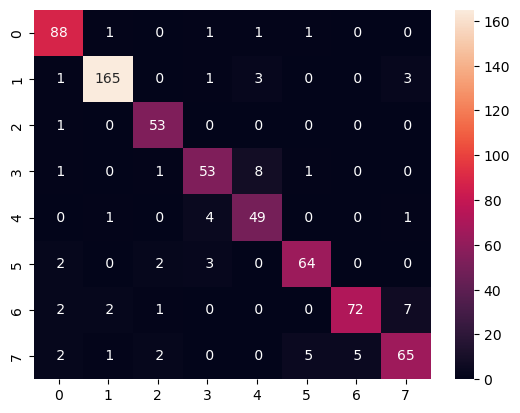

In [41]:
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True,fmt='2d')

In [43]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(test_y, y_pred)
print("accuracy",accuracy_dt)

accuracy 0.9049034175334324


In [45]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        92
           1       0.97      0.95      0.96       173
           2       0.90      0.98      0.94        54
           3       0.85      0.83      0.84        64
           4       0.80      0.89      0.84        55
           5       0.90      0.90      0.90        71
           6       0.94      0.86      0.89        84
           7       0.86      0.81      0.83        80

    accuracy                           0.90       673
   macro avg       0.89      0.90      0.89       673
weighted avg       0.91      0.90      0.90       673



In [65]:
model_RF=RandomForestClassifier()
model_RF=model_RF.fit(train_x,train_y)
y_pred=model_RF.predict(test_x)

In [66]:
y_pred

array([2, 5, 1, 7, 1, 6, 5, 4, 6, 4, 2, 5, 1, 1, 5, 1, 5, 1, 1, 6, 7, 4,
       7, 1, 7, 4, 3, 1, 1, 5, 6, 1, 2, 1, 0, 0, 7, 1, 6, 3, 4, 0, 4, 4,
       6, 1, 1, 2, 6, 6, 1, 7, 1, 1, 6, 1, 5, 6, 3, 5, 6, 2, 6, 6, 1, 4,
       1, 1, 5, 0, 7, 0, 6, 0, 5, 5, 3, 1, 6, 2, 6, 6, 1, 4, 4, 1, 6, 5,
       3, 7, 7, 3, 4, 2, 7, 6, 2, 3, 1, 1, 6, 6, 6, 1, 1, 5, 0, 1, 4, 5,
       6, 4, 0, 3, 0, 0, 6, 1, 1, 2, 1, 1, 6, 2, 1, 7, 3, 6, 7, 4, 5, 1,
       6, 0, 3, 3, 6, 1, 1, 1, 1, 5, 1, 1, 7, 1, 2, 6, 4, 7, 1, 1, 6, 0,
       1, 0, 3, 3, 0, 6, 2, 1, 1, 0, 3, 4, 6, 1, 5, 0, 0, 0, 7, 1, 1, 1,
       0, 3, 1, 7, 0, 1, 6, 4, 2, 0, 4, 7, 1, 5, 1, 2, 0, 6, 1, 1, 1, 5,
       1, 1, 1, 3, 1, 0, 0, 0, 5, 5, 6, 1, 0, 7, 7, 1, 1, 1, 3, 3, 4, 2,
       0, 2, 7, 1, 5, 3, 4, 0, 3, 4, 6, 0, 0, 7, 0, 5, 7, 3, 5, 0, 1, 1,
       4, 6, 1, 1, 4, 1, 6, 3, 5, 1, 2, 4, 0, 7, 1, 3, 5, 2, 1, 4, 4, 3,
       1, 1, 6, 7, 3, 0, 2, 3, 6, 1, 4, 7, 1, 1, 3, 4, 6, 1, 2, 3, 1, 6,
       1, 1, 1, 1, 0, 7, 6, 1, 5, 5, 0, 0, 1, 7, 1,

<Axes: >

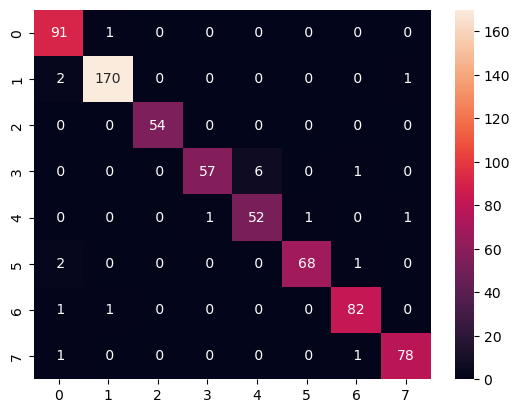

In [69]:
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True,fmt='2d')

In [71]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        92
           1       0.99      0.98      0.99       173
           2       1.00      1.00      1.00        54
           3       0.98      0.89      0.93        64
           4       0.90      0.95      0.92        55
           5       0.99      0.96      0.97        71
           6       0.96      0.98      0.97        84
           7       0.97      0.97      0.97        80

    accuracy                           0.97       673
   macro avg       0.97      0.96      0.97       673
weighted avg       0.97      0.97      0.97       673



In [73]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(test_y, y_pred)
print("accuracy",accuracy_rf)

accuracy 0.9687964338781575


In [75]:
model_svm=SVC()
model_svm=model_svm.fit(train_x,train_y)
y_pred=model_svm.predict(test_x)

<Axes: >

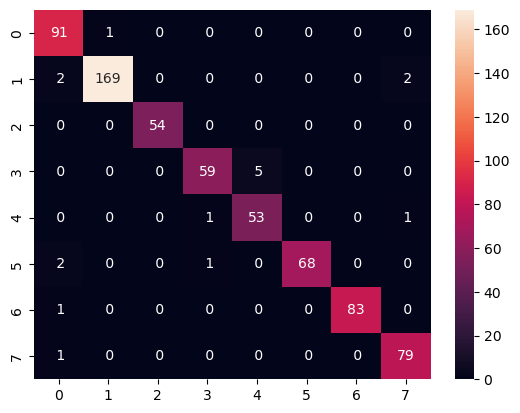

In [77]:
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True,fmt='2d')

In [79]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        92
           1       0.99      0.98      0.99       173
           2       1.00      1.00      1.00        54
           3       0.97      0.92      0.94        64
           4       0.91      0.96      0.94        55
           5       1.00      0.96      0.98        71
           6       1.00      0.99      0.99        84
           7       0.96      0.99      0.98        80

    accuracy                           0.97       673
   macro avg       0.97      0.97      0.97       673
weighted avg       0.98      0.97      0.97       673



In [81]:
from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(test_y, y_pred)
print("accuracy",accuracy_svc)

accuracy 0.974739970282318


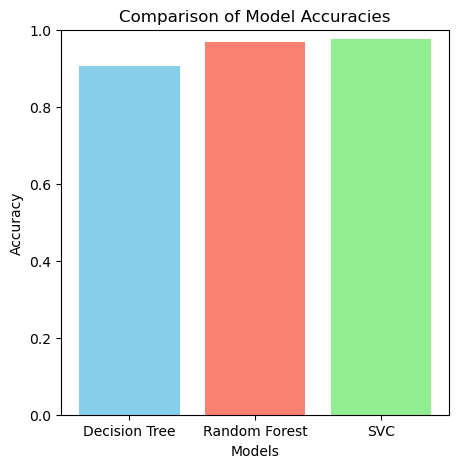

In [109]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
models = ['Decision Tree','Random Forest', 'SVC']
accuracies = [accuracy_dt, accuracy_rf, accuracy_svc]  # replace with your actual accuracy values

# Plotting
plt.figure(figsize=(5, 5))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # assuming accuracy is in percentage

#for i, accuracy in enumerate(accuracies):
 #   plt.text(i, accuracy-0.05 , f'{accuracy:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()